In [1]:
import pandas as pd         #Pandas, Python'da veri işleme ve analizi için güçlü bir kütüphanedir.

In [2]:
import seaborn as sns         #Seaborn, Python'da veri görselleştirmesi için kullanılan bir kütüphanedir. 
                             #Matplotlib ustune insaa edilmistir.

In [3]:
import matplotlib.pyplot as plt    #Python'da veri görselleştirmesi yapmak için yaygın olarak kullanılan bir kütüphanedir.

In [4]:
data = pd.read_csv("Temps.csv", parse_dates=["dt"])  #dt yani datetime datetime olarak degil object olarak girilmis onu duzelmek
                              #icin parse_dates=["dt"] (dt kolon adi) verirsek datetime a ceviriyoruz.!!
data.head()       #Farkli sekilde ayrilmis verilerde sep="\" gibi sekilde ayrildigi sekle gore okutabilirsiniz
                 #bazen mesela AverageTemperature daki ayrilma . ile oldu mesela bu bazen yanlis koyulmus olabilir. 
                #bunu onune gecmek icin ilki decimal: str yi ayarlariz bir de thousands i degistirerek dogru okutabiliriz

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [5]:
data.dtypes   #data.dtypes ise veri setimizdeki verilerin hangi turde oldugunu bastiriyor.
#parse_dates["dt"] komutu ile dt kolonunu datetime formatina cevirdik. boylelikle datetime ozelliklerinden faydalanicaz

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [6]:
data.info()   #bu da veri setimizi incelemeye yariyor dtypes dan farki biraz daha detayli incelememize olanak taniyor.
#satirlarin non null olan degerlerini yani dolu olan satirlari bize deger olarak da donduruyor.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             239177 non-null  datetime64[ns]
 1   AverageTemperature             228175 non-null  float64       
 2   AverageTemperatureUncertainty  228175 non-null  float64       
 3   City                           239177 non-null  object        
 4   Country                        239177 non-null  object        
 5   Latitude                       239177 non-null  object        
 6   Longitude                      239177 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 12.8+ MB


In [7]:
data.describe()   #veri setimizdeki bazi sayisal degerleri gosteriyor. mesela min max standart sapma gibi
#ama dikkatli olmamiz gereken sey ise veri setimizin icinde bu degerleri etkileyen 
#gercek olmayan uc degerler olarbilir onlari ayirt etmekte fayda var. 
#mesela ortalamayi asiri dusuren cok dusuk degerler arada olabilir.

,dt,AverageTemperature,AverageTemperatureUncertainty
count,239177,228175.000000,228175.000000
mean,1910-11-08 03:29:45.557976064,18.125969,0.969343
min,1743-11-01 00:00:00,-26.772000,0.040000
25%,1864-02-01 00:00:00,12.710000,0.340000
50%,1914-02-01 00:00:00,20.428000,0.592000
75%,1963-12-01 00:00:00,25.918000,1.320000
max,2013-09-01 00:00:00,38.283000,14.037000
std,NaN,10.024800,0.979644


In [8]:
#data.to_pickle("data_pickle")      #burada pcikle ile yeni bir veri seti olusturduk. bu veri setimiz daha kucuk boyutlu oluyor.
#data.to_parquet("data_parquet")      #bu da ayni islem genelde bu kullaniliyor. ama bunun icin ekstra kutuphane indirmek gerek.
                             #bazen veri setlerimiz cok buyuk olabilir 1gb gibi bunu csv olarak okumak cok uzun zaman alabilir
                            #bunun icin pickle formati haline getirtip serilestiriyoruz. daha rahat okunabilir hale getiriyoruz.

## Veri icerisindeki kayiplari ve basit kontrolleti yapalim

In [9]:
data.shape  #verimizin boyutunu ogreniyoruyz. kac satir kac kolon olduugnu gosteriyor

(239177, 7)

In [10]:
data.isna().sum() #burada data.isna tek basina true false dondururken .sum() parametresi ile sayi degerleri alabiliyoruz bos olanlarin.
    #verilerdeki kayiplar ne kadar bunu ogreniyoruz. belki bir kolonun %50 si kayip&bostur onu kaldirmak isteyebiliriz.
    #ya da 100000 de 10 15 bos vardir belki de sadece o bos olanlari atmak isteyebiliriz.

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [11]:
data.isna().sum() / data.shape[0] * 100   #burada ise kayiplari data shape imize boluyoruz 100 le carpip yuzde kac kayip goruyoruz
#kayip olan satirlarin toplam satirlara oranini gosteriyoruz. yuzdesel olarak ne kadarlik kayip veri var elimizde onu goruyoruz

dt                               0.000000
AverageTemperature               4.599941
AverageTemperatureUncertainty    4.599941
City                             0.000000
Country                          0.000000
Latitude                         0.000000
Longitude                        0.000000
dtype: float64

In [12]:
data.dropna()    #bu dropna bize tek seferlik olarak bos degerleri silip yeni bir deger donduruyor. 
#!!!bunu kullanirken dikkatli olmaliyiz!!! 
    #tekrar calistirirsak verilerimizi fazladan silebiliriz dikkatli olmamiz gerek.
#simdi istteki %4.59 bos olan satirlari silecez. komple kolonu silmek yerine kayip olan rowlari silicez.

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239171,2013-04-01,12.563,1.823,Xian,China,34.56N,108.97E
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E


In [13]:
data.shape  #gordugumuz gibi yukarda silmesine ragmen tek seferlik oldugu icin burada silinmiyor

(239177, 7)

In [14]:
data_prepared = data.dropna()  #bos degerleri kalici olarak datamizdan silmek icin yeni datamizi eski datamizin ustune yaziyoruz

In [15]:
data.shape    #yeni datamiz artik bos degerler silinmis olarak gorunuyor.
#eger baska kolonlari silmis olsaydik ve data = data.dropna() komutunu calistirsaydik bize hata verecekti hata ise:
#senin zaten bu kolonlarin kaldirildi bir daha kaldiramazsin gibi hata dondurecekti.

(239177, 7)

In [16]:
data_prepared.shape   #bu hatanin onune gecmek icin eski datamiza degil de 
                      #data_prepare diye yeni bir degisken olusturup ona atamayi yapiyoruz
                    #gordugunuz gibi normal datasetim 239177 satir icerirken prepared datam 228175 satir iceriyor.

(228175, 7)

In [17]:
#eger tekrardan bir data degeri tutmasini istemiyorsak direkt olarak bunu da yapabiliriz.
#data.dropna(inplace = True)  ya da datayi direk olarak data = data.dropna()  ile esitleyip bir kopyalarini olusturmadan
#direkt olarak orijinal dosya uzerinde degisiklik yapip hafizada yer kaplamayiz. ama data_kopya = data.dropna() ile bir kopya
#olusturup hafizada yer kaplariz. bu cok buyuk dosyalar icin performansta dususlere sebep olabilir.

In [18]:
data_prepared = data.dropna(axis=0, how="any") #dropna icinde ve kullanilan onemli komutlar sunlardir. axis ve how
#axis bize satir veya sutunu belirtir. axis=0 olursa (default degeridir) satir bazinda islem yapariz 1 ise kolonda islem yapariz
#how komutu ise bize how="all" ve how="any" olmak uzere 2 ye ayrilir 
#any herhangi bir bos deger gorurse butun herseyi siler. 1 tane bile bos deger varsa siler
#all ise butun satir veya sutun bos ise o zaman silme islemini gerceklestirir. yani butun degerlerin bos olmasi lazim silmek icin

In [19]:
data_prepared.shape  #datadan dropladiklarimizi ayni sekilde prepared degiskenine esitledik.

(228175, 7)

In [20]:
data_prepared.isna().sum()   #veri setimizde bos degerlerimiz kalmadi.

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [21]:
data_prepared.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


## Kategorik degiskenlerde islem yapma (kolon secme ve degisiklikler yapma vb.)

In [22]:
type(data_prepared["City"]) #butun bir kolonu secme islemimizi bu sekilde yapiyoruz. 
#eger tek [] icinde yaparsak pandas serisi olarak aliriz

pandas.core.series.Series

In [23]:
type(data_prepared[["City"]])  #eger 2 tane [[]] icinde yazarsak bunu bir dataframe formatinda alicaz
#bunun ileride avantajlari ve dezavantajli oldugu noktalarda kullanicaz

pandas.core.frame.DataFrame

In [24]:
data_prepared[["City", "Country"]]  #birden fazla kolon secme islemimiz

,City,Country
0,Abidjan,Côte D'Ivoire
1,Abidjan,Côte D'Ivoire
2,Abidjan,Côte D'Ivoire
3,Abidjan,Côte D'Ivoire
4,Abidjan,Côte D'Ivoire
...,...,...
239171,Xian,China
239172,Xian,China
239173,Xian,China
239174,Xian,China


In [25]:
data_prepared["City"].unique()  #burada ise uniq olan degerleri gosteriyoruz. yani tekrarlanan verileri gormuyoruz
                            #hangi sehirlerde olcumler yapilmis onu goruyoruz.

array(['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria',
       'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte',
       'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta',
       'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu',
       'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam',
       'Delhi', 'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh',
       'Guangzhou', 'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad',
       'Ibadan', 'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah',
       'Jinan', 'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa',
       'Lagos', 'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles',
       'Luanda', 'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne',
       'Mexico', 'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur',
       'Nairobi', 'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking',
       'Pune', 'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome', 'São Paulo',
       'S

In [26]:
len(data_prepared["City"].unique())  #burada ise yukaridaki uniq degerlerin kac tane oldugunu gosteriyor
                    #burada toplamda kac tane sehirde olcum yapilmis onlarin sayisini goruyoruz

100

In [27]:
data_prepared["Country"].value_counts()   #secilen kolondaki degerlerden hangisinden kac tane oldugunu gosteriyor.
                                    #secilen kolondaki degerlerin kac tane degere sahip oldugunu gosteriyor. gruplama yapiyor

Country
China                                 34952
India                                 34627
Brazil                                12139
Turkey                                 9239
United States                          8237
Egypt                                  7550
Pakistan                               6490
Russia                                 6332
Canada                                 6282
Nigeria                                5200
Australia                              4138
Japan                                  4050
Colombia                               4003
Saudi Arabia                           3856
Indonesia                              3758
South Africa                           3746
Spain                                  3166
Italy                                  3166
Germany                                3166
United Kingdom                         3166
Ukraine                                3166
France                                 3166
Morocco                 

In [28]:
data_prepared["Country"].value_counts().shape  #toplamda kac tane ulke oldugunu boyle de gorebiliyoruz. hepsi uniq degerler

(49,)

In [29]:
data_prepared[data_prepared["Country"] == "Turkey"]   #data prepared icinde aratirsak hangi indexlerde Turkey degerleri oldugunu getiriyor. 
#data_prepared["Country"] == "Turkey"  data_preapred icinde aratmazsak  true false olarak donduruyor.   
            #filtreleme islemi yapiyoruz. 
           #mesela bu veri seti icinden sadece Turkiyenin verilerini cekmemiz istendi.

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
96617,2013-04-01,16.643,0.337,Izmir,Turkey,37.78N,26.44E
96618,2013-05-01,21.723,0.407,Izmir,Turkey,37.78N,26.44E
96619,2013-06-01,24.416,0.589,Izmir,Turkey,37.78N,26.44E
96620,2013-07-01,26.451,0.277,Izmir,Turkey,37.78N,26.44E


In [30]:
data_prepared[(data_prepared["Country"] == "Turkey") | (data_prepared["Country"] == "Brazil")] # | isareti veya isaretidir. 
#country kolonunda tipi Turkey veya Brazil olanlari cagirmamiza yaradi
#ulkesi hem Turkey hem Brazil olan sonuclari filtreliyoruz.tek kolonda birden fazla ulke getirdik.

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
198855,2013-04-01,26.651,0.202,Salvador,Brazil,13.66S,38.81W
198856,2013-05-01,25.757,0.548,Salvador,Brazil,13.66S,38.81W
198857,2013-06-01,25.007,0.936,Salvador,Brazil,13.66S,38.81W
198858,2013-07-01,24.419,0.555,Salvador,Brazil,13.66S,38.81W


In [31]:
data_prepared[(data_prepared["Country"] == "Turkey") & (data_prepared["AverageTemperature"] > 20)]  # & isareti ve isaretidir
#country kolonundaki degeri Turkey olup ayni zamanda averagetemperature degeri 20 den buyuk olanlari filtreledik

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E
11900,1755-08-01,20.793,2.475,Ankara,Turkey,39.38N,33.29E
11910,1756-06-01,20.433,2.512,Ankara,Turkey,39.38N,33.29E
11911,1756-07-01,21.761,1.996,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
96611,2012-10-01,21.292,0.574,Izmir,Turkey,37.78N,26.44E
96618,2013-05-01,21.723,0.407,Izmir,Turkey,37.78N,26.44E
96619,2013-06-01,24.416,0.589,Izmir,Turkey,37.78N,26.44E
96620,2013-07-01,26.451,0.277,Izmir,Turkey,37.78N,26.44E


In [32]:
data_prepared[data_prepared["Country"].isin(["Turkey", "Brazil", "United States"])]  #burada ise .isin komutunu kullandik
#tek tek Turkey Brazil US degerleri olanlari getir diye yukaridaki gibi uzun sekilde yazmak yerine .isin komutu icine
#country kolonunda "girilen deger" olanlar var mi var ise bunlari bize getir diyerek cagirabiliyoruz. isimizi kisaltiyor.

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
198855,2013-04-01,26.651,0.202,Salvador,Brazil,13.66S,38.81W
198856,2013-05-01,25.757,0.548,Salvador,Brazil,13.66S,38.81W
198857,2013-06-01,25.007,0.936,Salvador,Brazil,13.66S,38.81W
198858,2013-07-01,24.419,0.555,Salvador,Brazil,13.66S,38.81W


In [33]:
data_prepared[data_prepared["Country"].isin(["Turkey", "Brazil", "United States"])]["Country"].value_counts()
#sectigimiz ulkelerin ne kadar gectiginin sayilarini da sonuna ["country"].value_counts() degerlerini ekleyerek cagirabiliriz.

Country
Brazil           12139
Turkey            9239
United States     8237
Name: count, dtype: int64

In [34]:
data_selected = data_prepared[data_prepared["Country"].isin(["Turkey", "Brazil", "United States"])] #bundan sonra bu secili
#3 ulkede islem yapmak istedigim icin onlari tekrar tekrar yazmamak icin bir degiskene atadim.

In [35]:
data_selected

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
198855,2013-04-01,26.651,0.202,Salvador,Brazil,13.66S,38.81W
198856,2013-05-01,25.757,0.548,Salvador,Brazil,13.66S,38.81W
198857,2013-06-01,25.007,0.936,Salvador,Brazil,13.66S,38.81W
198858,2013-07-01,24.419,0.555,Salvador,Brazil,13.66S,38.81W


## Gruplama islemleri. Mesela ulkelerin ortalama averagetemperature degerlerini getirme

In [36]:
data_selected.groupby(by="Country").mean(numeric_only=True)  #gropuby icine once kategori degiskenini secmemiz isteniyor.
#burada ulkelere gore ortalama sicakliklarini gruplamasini yapicaz sectigimiz 3 ulenin ortalama sicaklik degerlerini buluyoruz. 
#.mean() komutu bize ortalama degerleri dondurur. sayisal deger olarak sadece AverageTemperature ve AverageTemperature
#degerleri oldugu icin sadece bu 2 kolonun ortalama degerlerini alip bize getiriyoru ve biz bunu istiyorduk zaten.
#numeric_only komutumuz burada kodumuzu etkilemiyor, onu yazmazsak bir hata aliyoruz onun bastirilmasini engelliyor.

,AverageTemperature,AverageTemperatureUncertainty
Country,,
Brazil,22.847555,0.877419
Turkey,13.790998,1.391654
United States,11.257246,1.200292


In [37]:
data_selected.groupby(by="Country").max()  #.max komutu ise ulkelerin maximum sicaklik degerlerini getiriyor.
#burada numeric_only kodunuz yazmazsak .max() icine farkli birkac degerimiz daha gelir. max sicakliklarin oldugu satiri getirir.

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Latitude,Longitude
Country,,,,,,
Brazil,2013-08-01,29.986,5.277,São Paulo,4.02S,47.50W
Turkey,2013-08-01,29.845,8.459,Izmir,40.99N,33.29E
United States,2013-09-01,29.141,10.193,New York,42.59N,87.27W


In [38]:
data_selected.groupby(by="Country").min(numeric_only=True)  #.min komutumuz ise minimum degerleri getiriyor

,AverageTemperature,AverageTemperatureUncertainty
Country,,
Brazil,13.536,0.040
Turkey,-6.280,0.062
United States,-9.162,0.075


In [39]:
numeric_columns = data_selected.select_dtypes(include='number').columns
result = data_selected.groupby(by="Country")[numeric_columns].agg(["min", "max", "mean"])

#burada ise agg komutu sayesinde
#ustteki kodlari tek satirda daha kisa sekilde yazabiliyoruz. agg komutunun icine bastirmak istedigimiz olcumleri giriyoruz.

In [40]:
data_selected.drop(columns=["dt", "City", "Latitude", "Longitude"]).groupby("Country").agg(["min", "max", "mean"])  
#burada ise dt kolonunu min ve max degerleri bir isimize yaramadigi icin onlari ciktimizdan cikartip 
#tekrardan min max ve mean degerlerini bastiriyoruz.
#estradan  "City", "Latitude", "Longitude" kolonlarini da cikarmak zorunda kaldik cunku onlarin min max degerlerini alamadigi icin

AverageTemperature                     \
                             min     max       mean   
Country                                               
Brazil                    13.536  29.986  22.847555   
Turkey                    -6.280  29.845  13.790998   
United States             -9.162  29.141  11.257246   

              AverageTemperatureUncertainty                    
                                        min     max      mean  
Country                                                        
Brazil                                0.040   5.277  0.877419  
Turkey                                0.062   8.459  1.391654  
United States                         0.075  10.193  1.200292

In [41]:
import numpy as np  #numpy kutuphanesini import ediyoruz

In [42]:
numeric_columns = data_selected.select_dtypes(include=[np.number]).columns   #sadece numeric olan kolonlari seciyoruz burada
data_selected.groupby(by="Country")[numeric_columns].agg(["min", "max", "mean"])
#burada ise sadece numeric kolonlarda agg metodu ile min max ve mean durumlarini yazdiriyoruz.
#sadece numeric kolonlari getirdigimiz icin uyari mesaji gormuyoruz.
#select_dtypes(include=[np.number]).columns komutunu ekleyerek sadece sayisal degerleri olan kolonlari cekiyoruz.

AverageTemperature                     \
                             min     max       mean   
Country                                               
Brazil                    13.536  29.986  22.847555   
Turkey                    -6.280  29.845  13.790998   
United States             -9.162  29.141  11.257246   

              AverageTemperatureUncertainty                    
                                        min     max      mean  
Country                                                        
Brazil                                0.040   5.277  0.877419  
Turkey                                0.062   8.459  1.391654  
United States                         0.075  10.193  1.200292

# Gorsellestirmeler

In [43]:
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E


In [44]:
tr_avg_temps = data_selected[data_selected["Country"]=="Turkey"]["AverageTemperature"]
#Turkiye ozelinde tarih ve sicakliktan bagimsiz olarak ortlama sicakliklari gosteriyoruz

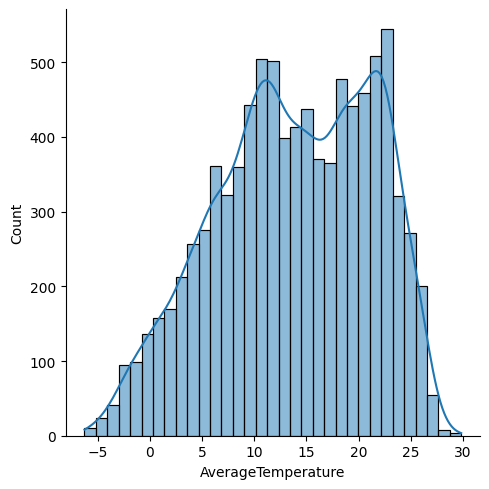

In [45]:
sns.displot(tr_avg_temps, kde=True)  #tr_avg_temps'in dagilim grafigini cikartiyoruz
#sns ile seaborn kutuphanesini cagiriyoruz. histografik grafigi cikartmak icin ise displot komutunu kullaniyoruz.
#displot icine ise grafigini istedigimiz verileri giriyoruz artindan kde degerini true yapiyoruz
#kde degeri ise (Kernel Density Estimation) parametresi, bir veri dağılımının yoğunluğunu tahmin etmek için kullanılır. 
#yani dis taraftaki cizdileri bize bastiriyor.
#sns.displot() yazip () icine gelip shift+tab yaparsaniz icine girmeniz gereken degerleri de gorebilirsiniz.

#### Birden fazla ulkenin grafiklerini elimizle tek tek yazmak yerine tek seferde cizdirmek icin kullanacagimiz yontem.

In [46]:
ulkeler = data_selected["Country"].unique()   #ulkeler adinda uniq olarak ulke isimlerini iceren bir degisken olusturduk

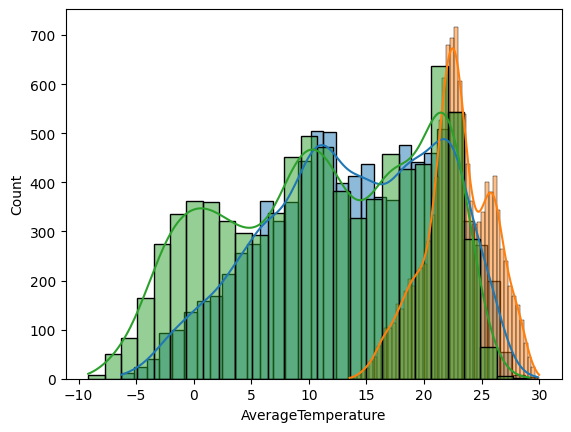

In [47]:
for ulke in ulkeler:  #ulke degiskenini ulkeler icinde dolasan bir deger olarak atadik
    data = data_selected[data_selected["Country"]==ulke]["AverageTemperature"]  
                                    #ulke degiskenini kullanarak butun ulkelerin ortalama sicaklik durumlarini aldik
    sns.histplot(data, kde=True)    #burada ise sns.histplot ile tek grafik icinde 3 ulkenin de sicaklik dagilimlarini cizdirdik

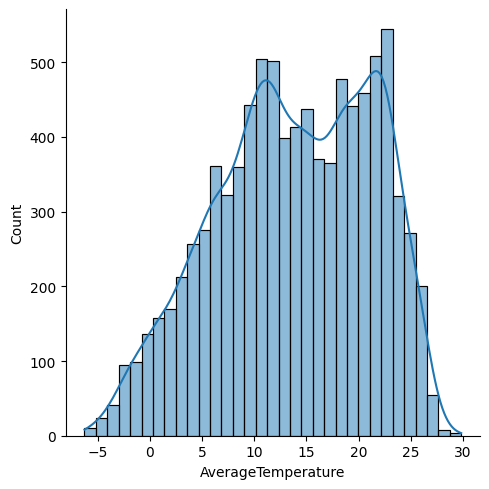

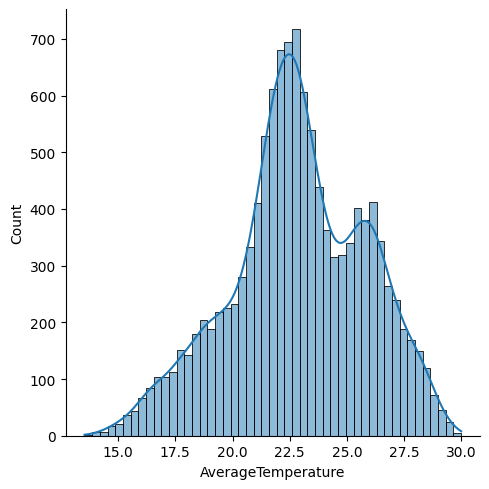

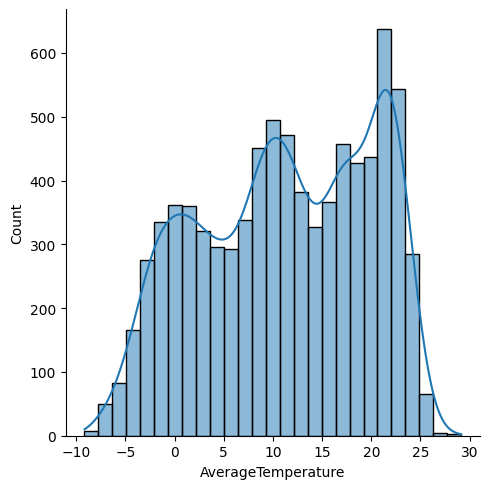

In [48]:
for ulke in ulkeler:
    data = data_selected[data_selected["Country"]==ulke]["AverageTemperature"]  
    sns.displot(data, kde=True)    #histplot yerine displot kullanarak ulkelerin ayri ayri grafiklerini cikardik.

C:\Users\tkaan\AppData\Local\Temp\ipykernel_6068\2549287843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True) #burada ise distplot ile ic ice grafikleri olusturduk ama distplot eskidigi icin uyari dondurdu
C:\Users\tkaan\AppData\Local\Temp\ipykernel_6068\2549287843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

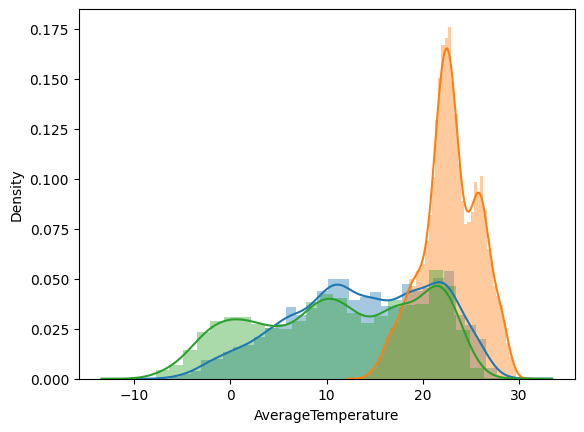

In [49]:
for ulke in ulkeler: 
    data = data_selected[data_selected["Country"]==ulke]["AverageTemperature"]  
    sns.distplot(data, kde=True) #burada ise distplot ile ic ice grafikleri olusturduk ama distplot eskidigi icin uyari dondurdu

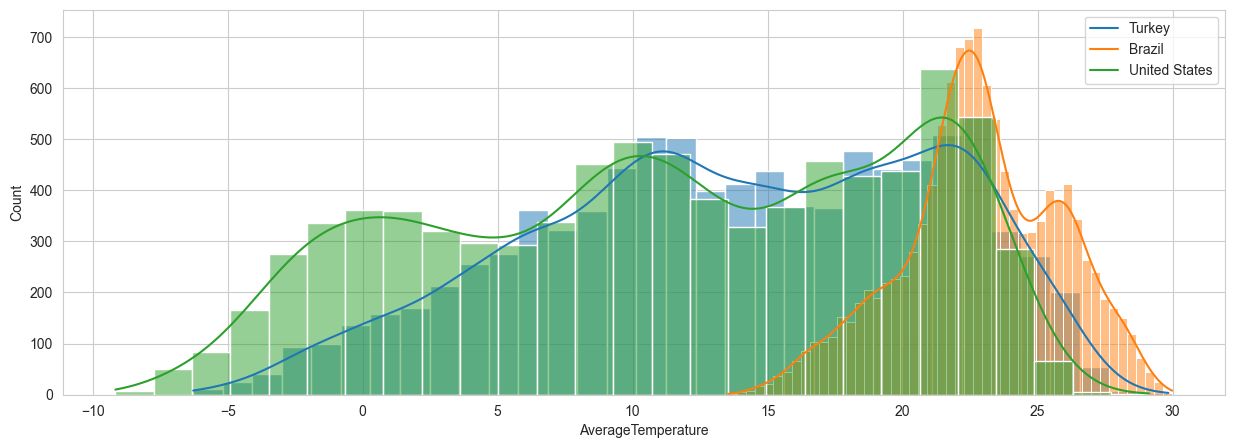

In [50]:
sns.set_style("whitegrid")  #arkasina beyaz mesh ekleyip daha guzel hale getiriyoruz
plt.figure(figsize=(15,5))


for ulke in ulkeler:
    data = data_selected[data_selected["Country"]==ulke]["AverageTemperature"]  
    sns.histplot(data, kde=True)
    
    
plt.legend(ulkeler)  #ulkelerin isimlerini ve hangi rengin hangi ulkeyi temsil ettigini gosteriyoruz

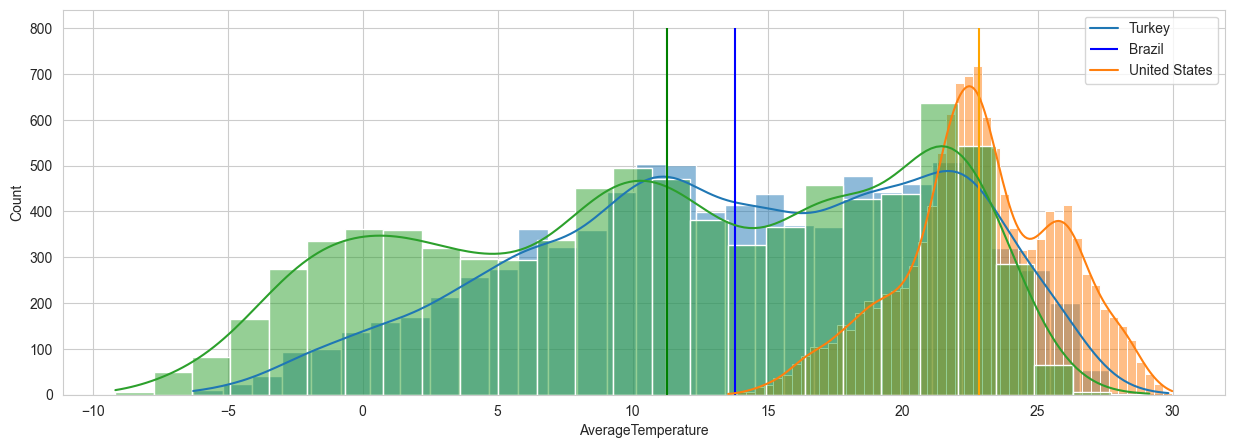

In [51]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
colors = ["blue","orange","green"]     #renklerini veriyoruz

#simdi ise yukarda aldigimiz gorselimize ulkelerin ortalamalarindan gecen bir cubuk ekleyecegiz.
for color, ulke in zip(colors ,ulkeler):
    data = data_selected[data_selected["Country"]==ulke]["AverageTemperature"]  
    sns.histplot(data, kde=True)
    ulke_mean = data_selected[data_selected["Country"]==ulke]["AverageTemperature"].mean()
    plt.vlines(ulke_mean,0 ,800, colors = color)    #x degerimiz ulke_mean x degerimizi ise en yuksek y degeri girebiliriz.
    
    
plt.legend(ulkeler)  #ulkelerin isimlerini ve hangi rengin hangi ulkeyi temsil ettigini gosteriyoruz

## Otomatiklestirme

In [57]:
data_selected.columns[1:3]

Index(['AverageTemperature', 'AverageTemperatureUncertainty'], dtype='object')

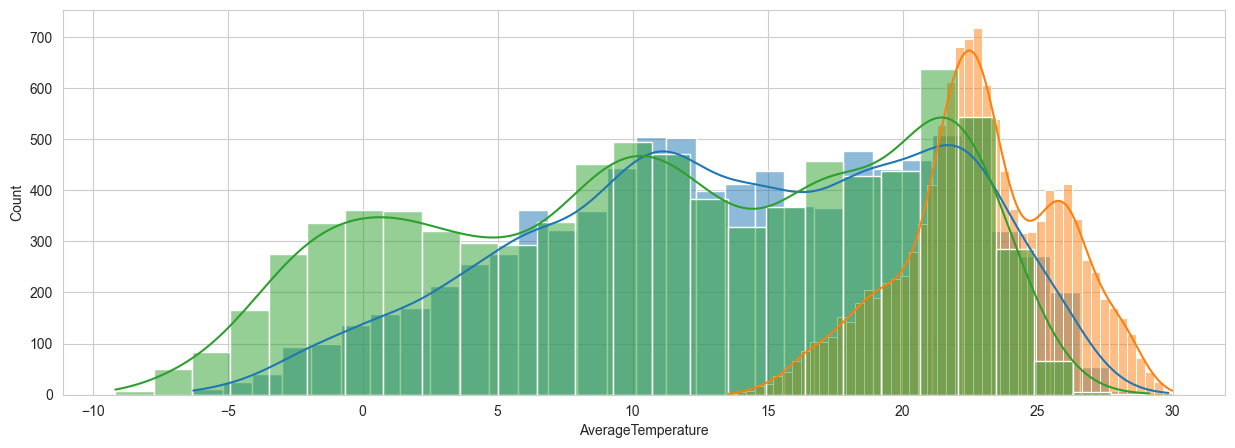

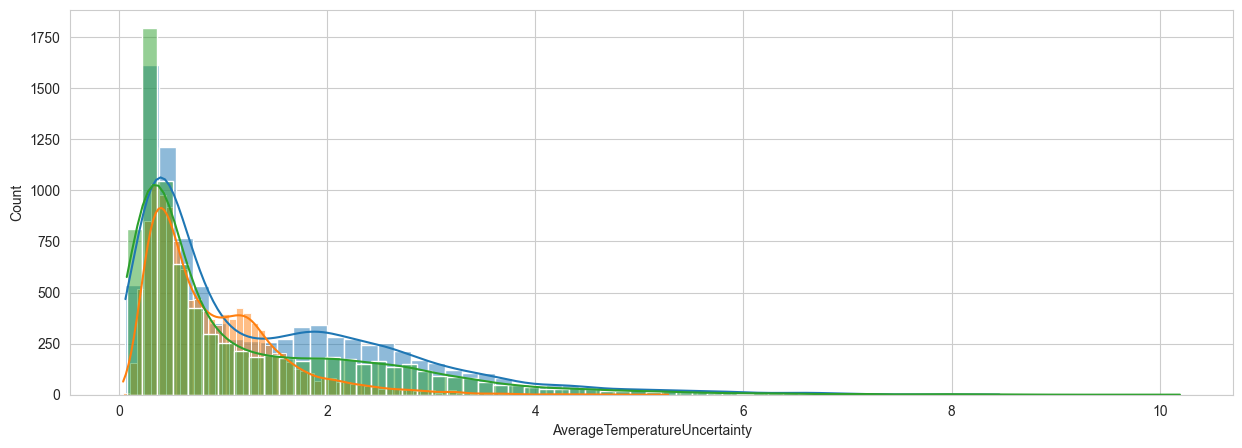

In [61]:
kolonlar = data_selected.columns[1:3]
ulkeler = data_selected["Country"].unique()

for kolon in kolonlar:
    plt.figure(figsize=(15,5))
    for ulke in ulkeler:
        data = data_selected[data_selected["Country"]==ulke][kolon]  
        sns.histplot(data, kde=True)
    plt.show()

# Scatter Plot

In [62]:
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E


In [63]:
tr_data = data_selected[(data_selected["Country"]=="Turkey") & (data_selected["dt"] > "01.01.1990")]
tr_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
14714,1990-02-01,0.339,0.260,Ankara,Turkey,39.38N,33.29E
14715,1990-03-01,5.908,0.364,Ankara,Turkey,39.38N,33.29E
14716,1990-04-01,9.687,0.125,Ankara,Turkey,39.38N,33.29E
14717,1990-05-01,13.127,0.313,Ankara,Turkey,39.38N,33.29E
14718,1990-06-01,18.174,0.267,Ankara,Turkey,39.38N,33.29E


<Axes: xlabel='dt', ylabel='AverageTemperature'>

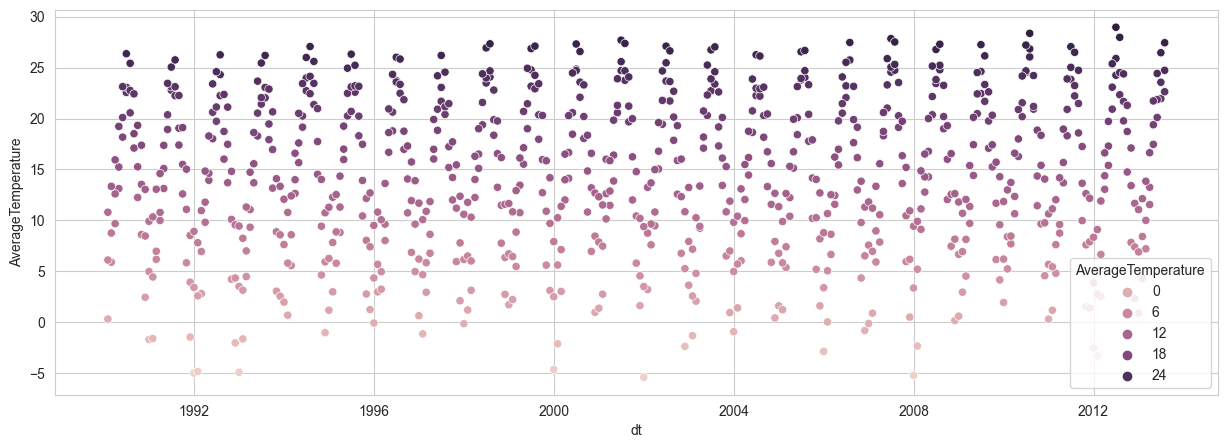

In [66]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="dt", y="AverageTemperature",data=tr_data, hue="AverageTemperature" )

<Axes: xlabel='dt', ylabel='AverageTemperature'>

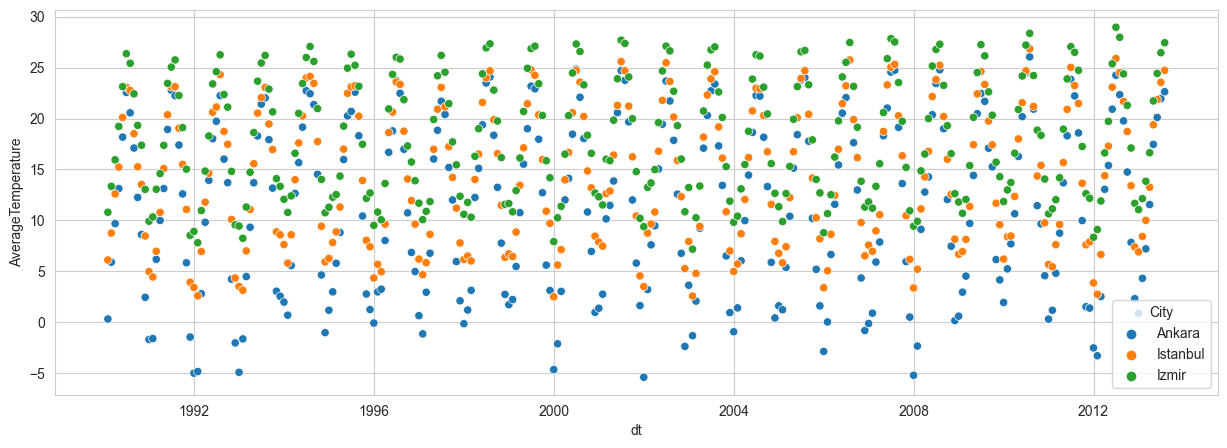

In [67]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="dt", y="AverageTemperature", data=tr_data, hue="City")